# Name: Sayan Paul 
Scholar numer: 222115107
Asignment number:2
Date: 20-01-2023

# Question 1

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("dataset_lab2.csv")

In [3]:
df

,Student ID,Class 10,Class 12,UG,PG,GATE Score,Work Exp,Admission Result
0,S01,80,61,65,70,593,No,YES
1,S02,64,61,65,64,450,Yes,YES
2,S03,69,72,69,80,480,Yes,YES
3,S04,85,59,67,66,620,No,NO
4,S05,64,66,65,65,423,Yes,NO
5,S06,70,66,72,68,590,No,YES
6,S07,71,52,85,92,670,No,NO
7,S08,56,54,72,75,523,Yes,NO
8,S09,82,87,63,85,382,No,NO
9,S10,65,65,69,68,602,Yes,YES


In [4]:
import sqlite3
db=sqlite3.connect('student_database04.db')
cursor=db.cursor()
cursor.execute("create table scores(StudentID primary key, Class_10 int, Class_12 int, UG int, PG int, GATE Score int, WorkExp, Admission_Result)") 
with open('dataset_lab2.csv','r') as file:   #scores_file.csv is present in Home page
    total_records=0
    for row in file:                                                     #initiating a for loop
        cursor.execute("insert into scores values(?,?,?,?,?,?,?,?)",row.split(",")) #'scores' is the table name.
        db.commit()                                                       # 3'?' correspond to 3 columns
        total_records+=1
print(total_records,"Records inserted")

11 Records inserted


In [5]:
result=cursor.execute("select * from scores")
for row in result:
    print(row)

('Student ID', 'Class 10', 'Class 12', 'UG', 'PG', 'GATE Score', 'Work Exp', 'Admission Result\n')
('S01', 80, 61, 65, 70, 593, 'No', 'YES\n')
('S02', 64, 61, 65, 64, 450, 'Yes', 'YES\n')
('S03', 69, 72, 69, 80, 480, 'Yes', 'YES\n')
('S04', 85, 59, 67, 66, 620, 'No', 'NO\n')
('S05', 64, 66, 65, 65, 423, 'Yes', 'NO\n')
('S06', 70, 66, 72, 68, 590, 'No', 'YES\n')
('S07', 71, 52, 85, 92, 670, 'No', 'NO\n')
('S08', 56, 54, 72, 75, 523, 'Yes', 'NO\n')
('S09', 82, 87, 63, 85, 382, 'No', 'NO\n')
('S10', 65, 65, 69, 68, 602, 'Yes', 'YES\n')


In [6]:
results=cursor.execute('select * from scores where Class_10 <65 and Admission_Result="YES\n"')

num_10_less_than_65_AY=0
for i in results:
    num_10_less_than_65_AY+=1
print(num_10_less_than_65_AY/10)

results=cursor.execute('select * from scores where Class_10 <65')

num_10_less_than_65=0
for i in results:
    num_10_less_than_65+=1
print(num_10_less_than_65/10)

0.1
0.3


In [7]:
results=cursor.execute('select * from scores where Class_12 <65 and Admission_Result="YES\n"')

num_12_less_than_65_AY=0
for i in results:
    num_12_less_than_65_AY+=1
print(num_12_less_than_65_AY/10)

results=cursor.execute('select * from scores where Class_12 <65')

num_12_less_than_65=0
for i in results:
    num_12_less_than_65+=1
print(num_12_less_than_65/10)

0.2
0.5


In [8]:
results=cursor.execute('select * from scores where UG <65 and Admission_Result="YES\n"')

num_UG_less_than_65_AY=0
for i in results:
    num_UG_less_than_65_AY+=1
print(num_UG_less_than_65_AY/10)

results=cursor.execute('select * from scores where UG <65')

num_UG_less_than_65=0
for i in results:
    num_UG_less_than_65+=1
print(num_UG_less_than_65/10)

0.0
0.1


In [9]:
results=cursor.execute('select * from scores where PG >70 and Admission_Result="YES\n"')

num_PG_more_than_70_AY=0
for i in results:
    num_PG_more_than_70_AY+=1
print(num_PG_more_than_70_AY/10)

results=cursor.execute('select * from scores where PG >70')

num_PG_more_than_70=0
for i in results:
    num_PG_more_than_70+=1
print(num_PG_more_than_70/10)

0.1
0.5


In [10]:
results=cursor.execute('select * from scores where GATE >400 and Admission_Result="YES\n"')

num_GATE_more_than_400_AY=0
for i in results:
    num_GATE_more_than_400_AY+=1
print(num_GATE_more_than_400_AY/10)

results=cursor.execute('select * from scores where GATE >400')

num_GATE_more_than_400=0
for i in results:
    num_GATE_more_than_400+=1
print(num_GATE_more_than_400/10)

0.5
1.0


In [11]:
#Since work experience is missing, we have to consider both Yes and NO.

In [12]:
results=cursor.execute('select * from scores where Admission_Result="YES\n"')

Got_admission=0
for i in results:
    Got_admission+=1
print(Got_admission/10)

0.5


In [13]:
#answer of 1A
"""What is the probability that a student gets admission given her marks in 10th are
below 65, 65 below in 12th, 65 below in UG, 70 above in PG, 400 above gate
score and work experience details are missing?"""
(num_10_less_than_65_AY/Got_admission)*(num_12_less_than_65_AY/Got_admission)*(num_UG_less_than_65_AY/Got_admission)*(num_PG_more_than_70_AY/Got_admission)*(num_GATE_more_than_400_AY/Got_admission)*Got_admission/(num_10_less_than_65*num_12_less_than_65*num_PG_more_than_70*num_GATE_more_than_400*num_UG_less_than_65)

0.0

In [14]:
#solution of 1B starts from here

In [15]:
results=cursor.execute('select * from scores where Class_10 >80 and Admission_Result="NO\n"')

num_10_more_than_80_AN=0
for i in results:
    num_10_more_than_80_AN+=1
print(num_10_more_than_80_AN/10)

results=cursor.execute('select * from scores where Class_10 >80')

num_10_more_than_80=0
for i in results:
    num_10_more_than_80+=1
print(num_10_more_than_80/10)

0.2
0.3


In [16]:
results=cursor.execute('select * from scores where Class_12 >75 and Admission_Result="NO\n"')

num_12_more_than_75_AN=0
for i in results:
    num_12_more_than_75_AN+=1
print(num_12_more_than_75_AN/10)

results=cursor.execute('select * from scores where Class_12 >75')

num_12_more_than_75=0
for i in results:
    num_12_more_than_75+=1
print(num_12_more_than_75/10)

0.1
0.2


In [17]:
results=cursor.execute('select * from scores where UG >65 and Admission_Result="NO\n"')

num_UG_more_than_65_AN=0
for i in results:
    num_UG_more_than_65_AN+=1
print(num_UG_more_than_65_AN/10)

results=cursor.execute('select * from scores where UG >65')

num_UG_more_than_65=0
for i in results:
    num_UG_more_than_65+=1
print(num_UG_more_than_65/10)

0.3
0.7


In [18]:
results=cursor.execute('select * from scores where PG <60 and Admission_Result="NO\n"')

num_PG_less_than_60_AN=0
for i in results:
    num_PG_less_than_60_AN+=1
print(num_PG_less_than_60_AN/10)

results=cursor.execute('select * from scores where PG <60')

num_PG_less_than_60=0
for i in results:
    num_PG_less_than_60+=1
print(num_PG_less_than_60/10)

0.0
0.0


In [19]:
results=cursor.execute('select * from scores where GATE <400 and Admission_Result="NO\n"')

num_GATE_less_than_400_AN=0
for i in results:
    num_GATE_less_than_400_AN+=1
print(num_GATE_less_than_400_AN/10)

results=cursor.execute('select * from scores where GATE <400')

num_GATE_less_than_400=0
for i in results:
    num_GATE_less_than_400+=1
print(num_GATE_less_than_400/10)

0.1
0.1


In [20]:
results=cursor.execute('select * from scores where WorkExp="Yes" and Admission_Result="NO\n"')

num_WEXP_YES_AN=0
for i in results:
    num_WEXP_YES_AN+=1
print(num_WEXP_YES_AN/10)

results=cursor.execute('select * from scores where WorkExp="Yes"')

num_WEXP_YES=0
for i in results:
    num_WEXP_YES+=1
print(num_WEXP_YES/10)

0.2
0.5


In [21]:
results=cursor.execute('select * from scores where Admission_Result="NO\n"')

No_admission=0
for i in results:
    No_admission+=1
print(No_admission/10)

0.5


In [22]:
#answer of 1B
"""What is the probability that a student is rejected for admission given her marks in
10th are above 80, 75 above in 12th, 65 above in UG, 60 below in PG, 400 below
gate score and has some work experience?"""

(num_10_more_than_80_AN/No_admission)*(num_12_more_than_75_AN/No_admission)*(num_UG_more_than_65/No_admission)*(num_PG_less_than_60_AN/No_admission)*(num_GATE_less_than_400/No_admission)*(num_WEXP_YES_AN/No_admission)*No_admission/(num_10_more_than_80*num_12_more_than_75*num_PG_less_than_60*num_GATE_less_than_400*num_WEXP_YES*num_UG_more_than_65)

ZeroDivisionError: float division by zero

In [23]:
#solution 1.C starts here

In [24]:
results=cursor.execute('select * from scores where Class_10 >80 and Admission_Result="YES\n"')

num_10_more_than_80_AY=0
for i in results:
    num_10_more_than_80_AY+=1
print(num_10_more_than_80_AY/10)

results=cursor.execute('select * from scores where Class_10 >80')

num_10_more_than_80=0
for i in results:
    num_10_more_than_80+=1
print(num_10_more_than_80/10)

0.0
0.3


In [25]:
#answer of 1C
"""What is the probability that a student gets admission given her marks in 10th are
above 80, 75 above in 12th, 65 above in UG, 60 below in PG, 400 below gate
score and has no work experience?"""

"""The answer will be zero since the value of one prior probability is zero"""

'The answer will be zero since the value of one prior probability is zero'

# Question 2

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [27]:
df=pd.read_csv('dataset_lab2.csv')
df

,Student ID,Class 10,Class 12,UG,PG,GATE Score,Work Exp,Admission Result
0,S01,80,61,65,70,593,No,YES
1,S02,64,61,65,64,450,Yes,YES
2,S03,69,72,69,80,480,Yes,YES
3,S04,85,59,67,66,620,No,NO
4,S05,64,66,65,65,423,Yes,NO
5,S06,70,66,72,68,590,No,YES
6,S07,71,52,85,92,670,No,NO
7,S08,56,54,72,75,523,Yes,NO
8,S09,82,87,63,85,382,No,NO
9,S10,65,65,69,68,602,Yes,YES


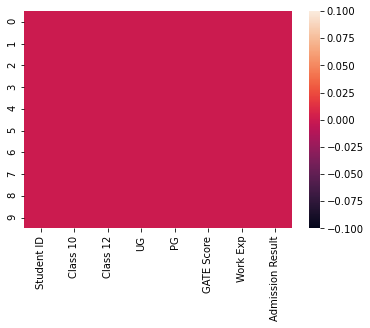

In [28]:
sns.heatmap(df.isnull())
plt.show()

#no null values present

In [29]:
df.describe()

,Class 10,Class 12,UG,PG,GATE Score
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,70.600000,64.300000,69.200000,73.300000,533.300000
std,9.191784,9.933669,6.338594,9.487419,95.827449
min,56.000000,52.000000,63.000000,64.000000,382.000000
25%,64.250000,59.500000,65.000000,66.500000,457.500000
50%,69.500000,63.000000,68.000000,69.000000,556.500000
75%,77.750000,66.000000,71.250000,78.750000,599.750000
max,85.000000,87.000000,85.000000,92.000000,670.000000


In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Admission Result']=le.fit_transform(df['Admission Result'])
df['Admission Result']



0    1
1    1
2    1
3    0
4    0
5    1
6    0
7    0
8    0
9    1
Name: Admission Result, dtype: int32

In [31]:
le1=LabelEncoder()
df['Work Exp']=le1.fit_transform(df['Work Exp'])

<AxesSubplot:xlabel='Class 10', ylabel='Density'>

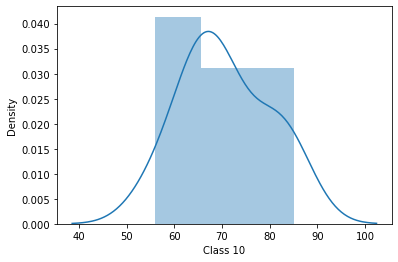

In [32]:
sns.distplot(df['Class 10'])

#very less skewness present.

<AxesSubplot:xlabel='Class 12', ylabel='Density'>

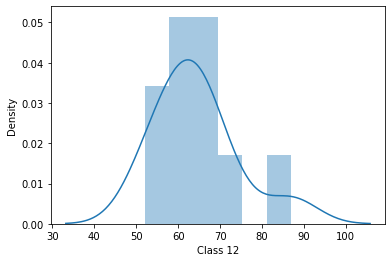

In [33]:
sns.distplot(df['Class 12'])

#slight skewness present

<AxesSubplot:xlabel='UG', ylabel='Density'>

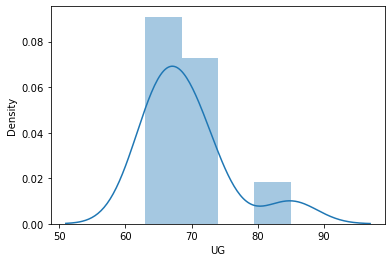

In [34]:
sns.distplot(df['UG'])

#slight skewness present
#outlier might be present.

<AxesSubplot:xlabel='PG', ylabel='Density'>

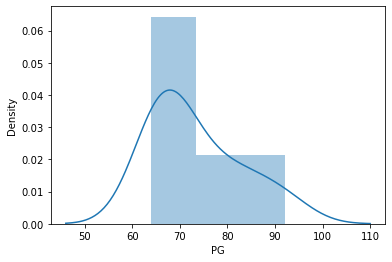

In [35]:
sns.distplot(df['PG'])

#slight skewness present

<AxesSubplot:xlabel='GATE Score', ylabel='Density'>

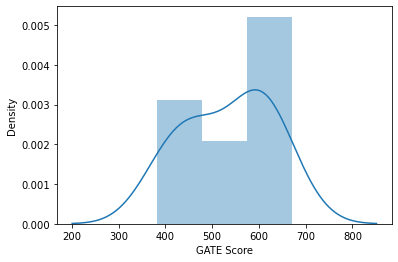

In [36]:
sns.distplot(df['GATE Score'])

#slight skewness present

<AxesSubplot:xlabel='Work Exp', ylabel='Count'>

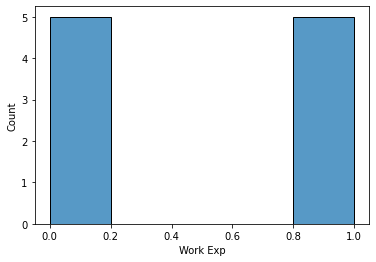

In [37]:
sns.histplot(df['Work Exp'])

<AxesSubplot:xlabel='Admission Result', ylabel='Count'>

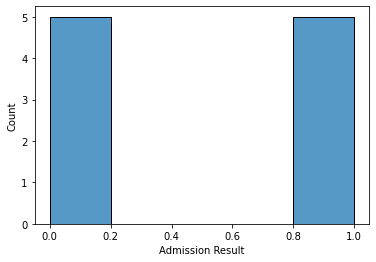

In [38]:
sns.histplot(df['Admission Result'])

In [39]:
df=df.drop(['Student ID'],axis=1)
df

,Class 10,Class 12,UG,PG,GATE Score,Work Exp,Admission Result
0,80,61,65,70,593,0,1
1,64,61,65,64,450,1,1
2,69,72,69,80,480,1,1
3,85,59,67,66,620,0,0
4,64,66,65,65,423,1,0
5,70,66,72,68,590,0,1
6,71,52,85,92,670,0,0
7,56,54,72,75,523,1,0
8,82,87,63,85,382,0,0
9,65,65,69,68,602,1,1


In [40]:
x=df.iloc[:,0:-1]

In [41]:
y=df.iloc[:,-1]

In [42]:
df

,Class 10,Class 12,UG,PG,GATE Score,Work Exp,Admission Result
0,80,61,65,70,593,0,1
1,64,61,65,64,450,1,1
2,69,72,69,80,480,1,1
3,85,59,67,66,620,0,0
4,64,66,65,65,423,1,0
5,70,66,72,68,590,0,1
6,71,52,85,92,670,0,0
7,56,54,72,75,523,1,0
8,82,87,63,85,382,0,0
9,65,65,69,68,602,1,1


In [43]:
#outlier removal
from scipy.stats import zscore
z=np.abs(zscore(df))


df_new=df[(z<3.0).all(axis=1)]
print(df.shape)
print(df_new.shape)

print("loss_percent= ",(df.shape[0]-df_new.shape[0])/df.shape[0]*100)

(10, 7)
(10, 7)
loss_percent=  0.0


In [44]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 1.07797031, -0.35017328, -0.69844961, -0.36664404,  0.65669415,
        -1.        ],
       [-0.75687277, -0.35017328, -0.69844961, -1.03326955, -0.91629184,
         1.        ],
       [-0.18348431,  0.81707099, -0.03325951,  0.7443985 , -0.58629478,
         1.        ],
       [ 1.65135877, -0.56239951, -0.36585456, -0.81106105,  0.95369151,
        -1.        ],
       [-0.75687277,  0.1803923 , -0.69844961, -0.9221653 , -1.2132892 ,
         1.        ],
       [-0.06880662,  0.1803923 ,  0.46563307, -0.58885254,  0.62369445,
        -1.        ],
       [ 0.04587108, -1.30519132,  2.62750092,  2.07764953,  1.50368661,
        -1.        ],
       [-1.67429431, -1.09296509,  0.46563307,  0.18887723, -0.11329899,
         1.        ],
       [ 1.3073257 ,  2.40876772, -1.03104466,  1.29991976, -1.66428518,
        -1.        ],
       [-0.64219508,  0.07427918, -0.03325951, -0.58885254,  0.75569327,
         1.        ]])

In [45]:
df.columns

Index(['Class 10', 'Class 12', 'UG', 'PG', 'GATE Score', 'Work Exp',
       'Admission Result'],
      dtype='object')

In [46]:
y

0    1
1    1
2    1
3    0
4    0
5    1
6    0
7    0
8    0
9    1
Name: Admission Result, dtype: int32

In [47]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x,y)

DecisionTreeClassifier()

In [48]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(x,y)

GaussianNB()

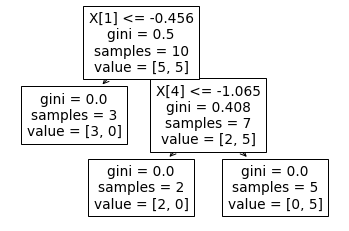

In [49]:
from sklearn import tree
tree.plot_tree(dtc)
plt.show()

In [50]:
scaler.transform(np.array([67,72,73,82,456,0]).reshape(1,6))

array([[-0.41283969,  0.81707099,  0.6319306 ,  0.966607  , -0.85029243,
        -1.        ]])

In [51]:
dtc.predict(scaler.transform(np.array([67,72,73,82,456,0]).reshape(1,6)))

array([1])

In [52]:
le.inverse_transform(dtc.predict(scaler.transform(np.array([67,72,73,82,456,le1.transform(['No'])[0]]).reshape(1,6))))[0]

'YES'

# Question 3

In [53]:
df_test=pd.read_csv('testset_lab2.csv')
df_test

,Student ID,Class 10,Class 12,UG,PG,GATE Score,Work Exp,Actual Admission Result
0,S11,59,80,77,70,550,No,NO
1,S12,54,78,68,64,593,Yes,NO
2,S13,69,72,69,80,480,No,YES
3,S14,56,59,62,66,620,Yes,NO
4,S15,67,68,69,66,386,Yes,YES


In [82]:
x_test=df_test.iloc[:,0:-1]
y_test=df_test.iloc[:,-1]

In [83]:
x_test["Work Exp"]=le1.transform(x_test["Work Exp"])

In [84]:
x_test["Work Exp"]

0    0
1    1
2    0
3    1
4    1
Name: Work Exp, dtype: int32

In [72]:
y_test=le.transform(y_test)

In [73]:
y_test

array([0, 0, 1, 0, 1])

In [76]:
df_test

,Student ID,Class 10,Class 12,UG,PG,GATE Score,Work Exp,Actual Admission Result
0,S11,59,80,77,70,550,No,NO
1,S12,54,78,68,64,593,Yes,NO
2,S13,69,72,69,80,480,No,YES
3,S14,56,59,62,66,620,Yes,NO
4,S15,67,68,69,66,386,Yes,YES


In [79]:
df_test.drop(columns=["Student ID"],axis=1,inplace=True)

In [81]:
df_test

,Class 10,Class 12,UG,PG,GATE Score,Work Exp,Actual Admission Result
0,59,80,77,70,550,No,NO
1,54,78,68,64,593,Yes,NO
2,69,72,69,80,480,No,YES
3,56,59,62,66,620,Yes,NO
4,67,68,69,66,386,Yes,YES


In [80]:
y_prec_dtc=dtc.predict(x_test)

ValueError: could not convert string to float: 'S11'

In [75]:
y_pred_clf=clf.predict(x_test)

ValueError: could not convert string to float: 'S11'

In [63]:
y_prec_dtc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [64]:
y_pred_clf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [65]:
x_test

,Class 10,Class 12,UG,PG,GATE Score,Work Exp
0,80,61,65,70,593,0
1,64,61,65,64,450,1
2,69,72,69,80,480,1
3,85,59,67,66,620,0
4,64,66,65,65,423,1
5,70,66,72,68,590,0
6,71,52,85,92,670,0
7,56,54,72,75,523,1
8,82,87,63,85,382,0
9,65,65,69,68,602,1


In [66]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_prec_dtc))
print('accuracy_score=',accuracy_score(y_test,y_prec_dtc))
print(classification_report(y_test,y_prec_dtc))

[[0 5]
 [0 5]]
accuracy_score= 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.50      1.00      0.67         5

    accuracy                           0.50        10
   macro avg       0.25      0.50      0.33        10
weighted avg       0.25      0.50      0.33        10



In [67]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred_clf))
print('accuracy_score=',accuracy_score(y_test,y_pred_clf))
print(classification_report(y_test,y_pred_clf))

[[5 0]
 [5 0]]
accuracy_score= 0.5
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         5
           1       0.00      0.00      0.00         5

    accuracy                           0.50        10
   macro avg       0.25      0.50      0.33        10
weighted avg       0.25      0.50      0.33        10

